# HW5 Coding Part

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import TensorDataset, DataLoader, random_split
import torchvision.transforms as transforms
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import classification_report

## Problem 0: Pytorch Tutorial (12 points)

### Tensors
Tensors can be created from numpy data or by using pytorch directly.

In [6]:
x_data = [[1, 2], [3, 4]]
#x = torch.tensor(x_data)

np_array = np.array(x_data)
x_np = torch.from_numpy(np_array)

shape = (2,3)
rand_tensor = torch.rand(shape)
np_rand_array = rand_tensor.numpy()

print(f"Tensor from np: \n {x_np} \n")
print(f"Rand Tensor: \n {rand_tensor} \n")
print(f"Rand Numpy Array: \n {np_rand_array} \n")

Tensor from np: 
 tensor([[1, 2],
        [3, 4]]) 

Rand Tensor: 
 tensor([[0.1809, 0.6071, 0.2467],
        [0.3261, 0.1255, 0.6261]]) 

Rand Numpy Array: 
 [[0.18094909 0.60708344 0.24674463]
 [0.32611442 0.12554431 0.626121  ]] 



#### 1) Tensor squeezing, unsqueezing and viewing (3 points)

Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.

In [10]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2],[3, 4],[5, 6]])
print("Original shape:", x.shape)  # Should be (3, 2)

############## YOUR CODE HERE ##############
# TODO: Add two new dimensions to x by using the function torch.unsqueeze(input, dim) -> Tensor, so that the size of x becomes (3, 1, 2, 1).
# Hint: Add dimension at position 1 (second dimension)
# Hint: Add dimension at position 3 (fourth dimension)
x = torch.unsqueeze(x,1)
x = torch.unsqueeze(x,3)
############## END YOUR CODE ##############
print(x.shape) # Should be torch.Size([3, 1, 2, 1])

############## YOUR CODE HERE ##############
# TODO: Remove the two dimensions just added by using the function torch.squeeze(input, dim) -> Tensor, and change the size of x back to (3, 2).
# Hint: Remove the dimension at position 3
# Hint: Remove the dimension at position 1
x= torch.squeeze(x,3)
x= torch.squeeze(x,1)
############## END YOUR CODE ##############
print(x.shape) # Should be torch.Size([3, 2])

############## YOUR CODE HERE ##############
# TODO: x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view(*shape) and change x to a one-dimensional vector with size being (6).
x=x.view(6)
############## END YOUR CODE ##############
print("After view:", x.shape)  # Should be torch.Size([6])

Original shape: torch.Size([3, 2])
torch.Size([3, 1, 2, 1])
torch.Size([3, 2])
After view: torch.Size([6])


### 2) Tensor concatenation and stack (2 points)

Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.

**Hints:**<br>
1. `torch.stack((obj1, obj2))`: A new dimension is automatically added (dim=0 by default) and the input tensors are then stacked along that dimension.
2. `torch.cat((obj1, obj2))`: Dimensions are not added, but are spliced directly over existing dimensions, you should consider this case.

In [29]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])

# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])

############## YOUR CODE HERE ##############
# TODO: Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y. Use torch.stack to generate such a z
z = torch.stack((x,y)) # Fill in this
############## END YOUR CODE ##############
print(z)

############## YOUR CODE HERE ##############
# TODO: Use torch.cat and torch.unsqueeze to generate z
z=torch.cat((x.unsqueeze(0),y.unsqueeze(0)),dim=0) # Fill in this
############## END YOUR CODE ##############
print(z)

# The tow outputs are expected to be tensor([[[ 1.,  2.], [ 3.,  4.], [ 5.,  6.]], [[-1., -2.], [-3., -4.], [-5., -6.]]])

tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])
tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])


#### 3) Tensor expansion (2 points)

Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice.

In [32]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])

# Our goal is to generate a tensor z with size (2, 3), so that z[0,:,:] = x, z[1,:,:] = x.

############## YOUR CODE HERE ##############
# TODO: Change the size of x into (1, 3) by using torch.unsqueeze.
x = x.unsqueeze(0)  # Fill in this
############## END YOUR CODE ##############
print(x) # Output is expected to be tensor([[1., 2., 3.]])

############## YOUR CODE HERE ##############
# TODO: Then expand the new tensor to the target tensor by using torch.Tensor.expand.
z =x.expand(2,3)# Fill in this
############## END YOUR CODE ##############
print(z) # Output is expected to be tensor([[1., 2., 3.], [1., 2., 3.]])

tensor([[1., 2., 3.]])
tensor([[1., 2., 3.],
        [1., 2., 3.]])


#### 4) Tensor reduction in a given dimension (5 points)

In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.

In [39]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10, 50)

############## YOUR CODE HERE ##############
# TODO: Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k, :] is the mean value of the k-th row of x.
# dim = 1: eliminate the second(1)'s dimension

x_mean = torch.mean(x,dim=1) # Fill in this

############## END YOUR CODE ##############
print(x_mean.shape)

############## YOUR CODE HERE ##############
# TODO: Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
x_sum = torch.sum(x,dim=1)# Fill in this
############## END YOUR CODE ##############
print(x_sum.shape)

############## YOUR CODE HERE ##############
# TODO: Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
# Hint: torch.max() -> (max_val, indices)
(x_max, indices) = torch.max(x,dim=1)  # Fill in this
############## END YOUR CODE ##############
print(x_max.shape)

############## YOUR CODE HERE ##############
# TODO: Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
# Hint: torch.max() -> (min_val, indices)
(x_min, indices) = torch.min(x,dim=1)  # Fill in this
############## END YOUR CODE ##############
print(x_min.shape)

############## YOUR CODE HERE ##############
# TODO: Compute the top-5 values for each row of x.
# You need to generate a tensor x_min of size (10. 5).
# Hint: torch.max() -> (min_val, indices)
(x_xtop, indices) = torch.topk(x,5,dim=1)  # Fill in this
############## END YOUR CODE ##############
print((x_xtop.shape))

torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10, 5])


### Autograd (0 point) (Highly recommend checking it out)
This small section shows you how pytorch computes gradients. When we create tenors, we can set `requires_grad` to be true to indicate that we are using gradients. For most of the work that you actually do, you will use the `nn` package, which automatically sets all parameter tensors to have `requires_grad=True`.

In [40]:
# Below is an example of computing the gradient for a single data point in logistic regression using pytorch's autograd.

x = torch.ones(5)  # input tensor
y = torch.zeros(1)  # label
# requires_grad = True : we are using this parameter's gradient
# use nn package, set all parameter tensors to have required_grad = True
w = torch.randn(5, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
pred = torch.sigmoid(torch.matmul(x, w) + b)
loss = torch.nn.functional.binary_cross_entropy(pred, y)
loss.backward()  # Computers gradients
print("W gradient:", w.grad)
print("b gradient:", b.grad)

# when we want to actually take an update step, we can use optimizers:
optimizer = torch.optim.SGD([w, b], lr=0.1)  # [w,b] is the model.parameters()
print("Weight before", w)
optimizer.step()  # use the computed gradients to update
# Print updated weights
print("Updated weight", w)

# Performing operations with gradients enabled is slow...
# You can disable gradient computation using the following enclosure:
with torch.no_grad():
    # Perform operations without gradients
    ...

W gradient: tensor([[0.9576],
        [0.9576],
        [0.9576],
        [0.9576],
        [0.9576]])
b gradient: tensor([0.9576])
Weight before tensor([[-0.1509],
        [-1.1625],
        [ 0.5404],
        [ 1.8790],
        [ 1.9364]], requires_grad=True)
Updated weight tensor([[-0.2467],
        [-1.2583],
        [ 0.4446],
        [ 1.7832],
        [ 1.8406]], requires_grad=True)


### Devices (0 point) (Highly recommend checking it out)

Pytorch supports accelerating computation using GPUs which are available on google colab. To use a GPU on google colab, go to runtime -> change runtime type -> select GPU.

Note that there is some level of strategy for knowing when to use which runtime type. Colab will kick users off of GPU for a certain period of time if you use it too much. Thus, its best to run simple models and prototype to get everything working on CPU, then switch the instance type over to GPU for training runs and parameter tuning.

Its best practice to make sure your code works on any device (GPU or CPU) for pytorch, but note that numpy operations can only run on the CPU. Here is a standard flow for using GPU acceleration:

In [41]:
# Determine the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)
# Next create your tensors
tensor = torch.zeros(4, 4, requires_grad=True)
# Move the tensor to the device you want to use
tensor = tensor.to(device)

# Perform whatever operations you want.... (often this will involve gradients)
# These operations will be accelerated by GPU.
tensor = 10*(tensor + 1)

# bring the tensor back to CPU, first detaching it from any gradient computations
tensor = tensor.detach().cpu()

# Convert to numpy if you want to perform numpy operations.
tensor_np = tensor.numpy()

Using device cuda


### Build an NN (0 point) (Highly recommend checking it out)
Pytorch implements composable blocks in `Module` classes. All layers and modules in pytorch inherit from `nn.Module`. When you make a module you need to implement two functions: `__init__(self, *args, **kwargs)` and `foward(self, *args, **kwargs)`. Modules also have some nice helper functions, namely `parameters` which will recursively return all of the parameters. Here is an example of a logistic regression model:

In [42]:
class Perceptron(nn.Module):
  def __init__(self, in_dim):
    super().__init__()
    # This is a linear layer, it computes Xw + b
    self.layer = nn.Linear(in_dim, 1)

  def forward(self, x):
    return torch.sigmoid(self.layer(x)).squeeze(-1)


perceptron = Perceptron(10)
# Move all the perceptron's tensors to the device
perceptron = perceptron.to(device)
# module.parameters() return all the parameters in this module ; There W and b
print("Parameters", list(perceptron.parameters()))

Parameters [Parameter containing:
tensor([[ 0.1864,  0.2416, -0.2838, -0.1635,  0.0600, -0.2380,  0.3028, -0.2615,
         -0.0803,  0.2505]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.1193], device='cuda:0', requires_grad=True)]


### Datasets (0 point) (Highly recommend checking it out)
Pytorch has nice interfaces for using datasets. Suppose we create a logistic regression dataset as follows:

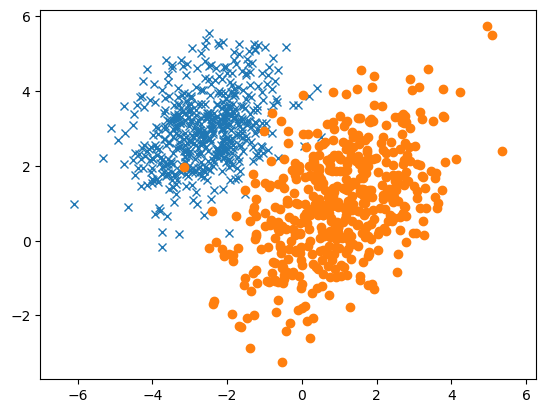

In [43]:
c1_x1, c1_x2 = np.random.multivariate_normal(
    [-2.5, 3], [[1, 0.3], [0.3, 1]], 500).T
c2_x1, c2_x2 = np.random.multivariate_normal([1, 1], [[2, 1], [1, 2]], 500).T
c1_X = np.vstack((c1_x1, c1_x2)).T
c2_X = np.vstack((c2_x1, c2_x2)).T
X = np.concatenate((c1_X, c2_X))
y = np.concatenate((np.zeros(500), np.ones(500)))
# Shuffle the data
permutation = np.random.permutation(X.shape[0])
X = X[permutation, :]
y = y[permutation]
# Plot the data
plt.plot(c1_x1, c1_x2, 'x')
plt.plot(c2_x1, c2_x2, 'o')
plt.axis('equal')
plt.show()

We can then create a pytorch dataset object as follows. Often times, the default pytorch datasets will create these objects for you. Then, we can apply dataloaders to iterate over the dataset in batches.

In [44]:
dataset = torch.utils.data.TensorDataset(
    torch.from_numpy(X), torch.from_numpy(y))
print(dataset)
# We can create a dataloader that iterates over the dataset in batches.
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)
for x, y in dataloader:
    print("Batch x:", x)
    print("Batch y:", y)
    break

# Clean up the dataloader as we make a new one later, you can ignore it here
del dataloader

Batch x: tensor([[-2.0813, -0.3804],
        [-2.6869,  3.1295],
        [ 2.1276,  2.6140],
        [ 2.6784,  3.1859],
        [ 0.5094,  2.7812],
        [-5.0996,  3.0200],
        [-2.4635,  1.8978],
        [ 2.2450,  3.0862],
        [-2.6486,  1.8843],
        [ 0.3541,  1.6220]], dtype=torch.float64)
Batch y: tensor([1., 0., 1., 1., 0., 0., 0., 1., 0., 1.], dtype=torch.float64)


Splitting Train, Validation and Test sets randomly.

In [45]:
#Training: 70%, Validation: 15%, Testing: 15%
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    dataset, [train_size, val_size, test_size]
)

# Creat the data_loders
batch_size = 10
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, shuffle=False)
test_loader = DataLoader(test_dataset, shuffle=False)

print(f"Training size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Testing size: {len(test_dataset)}")

Training size: 700
Validation size: 150
Testing size: 150


### <font color='red'>Training Loop and Progress Bar (0 point) (Very important! Highly recommend checking it out)</font>

Here is an example of training a full Logistic Regression model in pytorch. Note the extensive use of modules -- modules can be used for storing networks, computation steps etc.

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

epochs = 10
batch_size = 10
learning_rate = 0.01

num_features = dataset[0][0].shape[0]
model = Perceptron(num_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.BCELoss()

model.train()  # Put model in training mode
for epoch in range(epochs):
    training_losses = []
    train_correct = 0
    ProgressBar = tqdm(train_loader)
    for x, y in ProgressBar:
        x, y = x.float().to(device), y.float().to(device)
        #  for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropagation
        # Remove the gradients from the previous step ;Sets the gradients of all optimized torch.Tensor s to zero.
        optimizer.zero_grad()
        pred = model(x)   # The value predicted using our model
        # compute loss
        loss = criterion(pred, y)
        # Compute gradients.
        loss.backward()
        # update the parameter using the gradient computed
        optimizer.step()
        training_losses.append(loss.item())
        # In a classification task, the output of a neural network model is typically the scores or probabilities for each class.
        # For example, in a 10-class classification task, the output of the last layer of the model is a tensor with the shape of (batch_size, 10). For each sample (i.e., each row in pred), we can obtain the predicted class index of each sample by using torch.argmax(pred, dim=1).
        # So for multi-class classification tasks, try to use: train_correct += torch.sum(torch.argmax(pred, dim=1) == y).item()
        train_correct += torch.sum(torch.round(pred) == y).item()
    train_accuracy = train_correct / len(train_dataset)
    val_losses = []
    num_correct = 0
    with torch.no_grad():
        model.eval()  # Put model in eval mode
        for x_val, y_val in val_loader:
            x_val, y_val = x_val.float().to(device), y_val.float().to(device)
            pred_val = model(x_val)
            loss_val = criterion(pred_val, y_val)
            val_losses.append(loss_val.item())
            num_correct += torch.sum(torch.round(pred_val) == y_val).item()
        model.train()  # Put model back in train mode
    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {np.mean(training_losses):.4f} | "
          f"Train Acc: {train_accuracy:.4f} | "
          f"Val Loss: {np.mean(val_losses):.4f} | "
          f"Val Acc: {num_correct / len(val_dataset):.4f}")

# We can run predictions on the data to determine the Testing accuracy.
model.eval()
test_correct = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.float().to(device), y.float().to(device)
        pred = model(x)
        test_correct += torch.sum(torch.round(pred) == y).item()

print(f"\nTest Accuracy: {test_correct / len(test_dataset):.2%}")

Using device cuda


100%|██████████| 70/70 [00:00<00:00, 193.06it/s]


Epoch 1/10 | Train Loss: 0.5469 | Train Acc: 0.7486 | Val Loss: 0.4102 | Val Acc: 0.8667


100%|██████████| 70/70 [00:00<00:00, 845.55it/s]


Epoch 2/10 | Train Loss: 0.3745 | Train Acc: 0.8686 | Val Loss: 0.3381 | Val Acc: 0.8667


100%|██████████| 70/70 [00:00<00:00, 947.69it/s]


Epoch 3/10 | Train Loss: 0.3281 | Train Acc: 0.8800 | Val Loss: 0.3031 | Val Acc: 0.8733


100%|██████████| 70/70 [00:00<00:00, 876.08it/s]


Epoch 4/10 | Train Loss: 0.3016 | Train Acc: 0.8843 | Val Loss: 0.2801 | Val Acc: 0.8733


100%|██████████| 70/70 [00:00<00:00, 905.15it/s]


Epoch 5/10 | Train Loss: 0.2829 | Train Acc: 0.8914 | Val Loss: 0.2626 | Val Acc: 0.8733


100%|██████████| 70/70 [00:00<00:00, 742.80it/s]


Epoch 6/10 | Train Loss: 0.2683 | Train Acc: 0.8971 | Val Loss: 0.2487 | Val Acc: 0.8800


100%|██████████| 70/70 [00:00<00:00, 1028.82it/s]


Epoch 7/10 | Train Loss: 0.2562 | Train Acc: 0.9014 | Val Loss: 0.2368 | Val Acc: 0.8867


100%|██████████| 70/70 [00:00<00:00, 1098.24it/s]


Epoch 8/10 | Train Loss: 0.2460 | Train Acc: 0.9043 | Val Loss: 0.2266 | Val Acc: 0.9067


100%|██████████| 70/70 [00:00<00:00, 1018.87it/s]


Epoch 9/10 | Train Loss: 0.2371 | Train Acc: 0.9100 | Val Loss: 0.2176 | Val Acc: 0.9067


100%|██████████| 70/70 [00:00<00:00, 1055.42it/s]


Epoch 10/10 | Train Loss: 0.2292 | Train Acc: 0.9114 | Val Loss: 0.2096 | Val Acc: 0.9200

Test Accuracy: 90.00%


## Problem 1: MLP for FashionMNIST (18 points)

Now you will train a multi-layer perceptron model on the FashionMNIST dataset. Your deliverables are as follows:

1. Code for training an MLP on FashionMNIST.
2. A plot of the training and validation loss for at least 8 epochs.
3. A plot of the training and validation accuracy for each epoch, achieving a final validation accuracy of at least 82% by the end of the training.

Below we will create the training and validation datasets for you. It is on you to implement an MLP / Feed Forward neural network yourself. Please leverage the example training loop from above.

Here are some pytorch components that you should definitely use:
1. `nn.Linear`
2. Some activation: `nn.ReLU`, `nn.Tanh`, `nn.Sigmoid`, etc.
3. `nn.CrossEntropyLoss`
4. `nn.functional.log_softmax`

Here are some challenges that you will need to overcome:
1. The data is, by default, configured in image form, i.e. a (28 x 28) tensor per sample, instead of single feature vector. You will need to **reshape** it somewhere to feed it in as vector to the MLP. There are many ways of doing this according to **Problem 0**.
2. You need to write code for plotting.
3. You need to find the appropriate hyper-parameters to achieve good accuracy.

Your underlying model must be fully connected or "dense", and may not use any convolutions etc., but you can use anything in `torch.optim` or any layers in `torch.nn` besides `nn.Linear` that do not have weights.

In [47]:
# Creating the datasets
# feel free to modify this as you see fit.
transform = torchvision.transforms.ToTensor()

training_data = torchvision.datasets.FashionMNIST(
    root="./data",
    train=True,
    download=False,
    transform=transform,
)

validation_data = torchvision.datasets.FashionMNIST(
    root="./data",
    train=False,
    download=False,
    transform=transform,
)

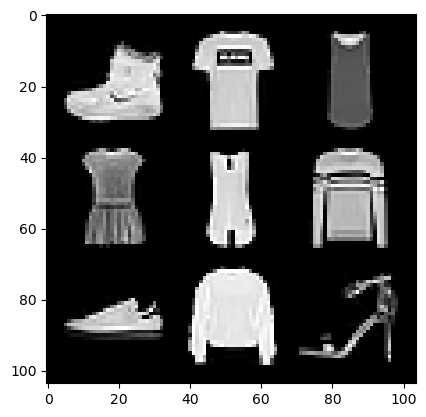

In [48]:
images = [training_data[i][0] for i in range(9)]
plt.imshow(torchvision.utils.make_grid(torch.stack(images),
           nrow=3, padding=5).numpy().transpose((1, 2, 0)))

In [49]:
# Get the knowledge of the Training and Validation Set
print("number of training samples: " + str(len(training_data)) + "\n" +
      "number of validation samples: " + str(len(validation_data)))
print("datatype of the 1st training sample: ", training_data[0][0].type())
print("size of the 1st training sample: ", training_data[0][0].size())

# Find out how many categories in the sample.
max_label = float("-inf")
min_label = float("inf")
for i in range(len(training_data)):
  if training_data[i][1] > max_label:
    max_label = training_data[i][1]
  if training_data[i][1] < min_label:
    min_label = training_data[i][1]
print("max_label = "+str(max_label))
print("min_label = "+str(min_label))

number of training samples: 60000
number of validation samples: 10000
datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])
max_label = 9
min_label = 0


In the cell below, you'll implement a MLP. Please follow the guidence in comments. <br>
**Scoring criteria:**<br>
**1. Print out the train loss, train accuracy, validation loss, and validation accuracy for each epoch. (8 points)**<br>
**2. Grading criteria: <br>
At the last epoch, if the validation accuracy (validation_acc) of your model is greater than or equal to 0.86, you will get `10 points`. <br>
If 0.83 <= validation_acc < 0.86, you will get `6 points`. <br>
If 0.80 <= validation_acc < 0.83, you will get `4 points`. <br>
If validation_acc < 0.80, you will not get any score. <br>
You are free to use the *early stopping* strategy that can prevent overfitting.**

In [68]:
############## YOUR CODE HERE ##############
# In this part, please follow our instruction step by step to get familiar with Pytorch, which would reduce your workload.

# 1. Confirm whether the CUDA is available or not.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

# 2. TODO: Encapsulate your Multilayer Perceptron (MLP) model within a class.
# This class should include a constructor function __init__(...) and a forward(...) function that is used to carry out forward propagation.
# You can modify these two functions' input parameters.
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim):
    ######## YOUR CODE HERE ########
        super().__init__()
        self.model=nn.Sequential(
            
            nn.Linear(in_dim, 512), # input layer
            nn.ReLU(), # activation function
            nn.Linear(512, 256), # hidden layer 1
            nn.ReLU(), # activation function
            nn.Linear(256, 128), # hidden layer 2
            nn.ReLU(), # activation function
            nn.Linear(128, 64), # hidden layer 3
            nn.ReLU(), # activation function
            nn.Linear(64, out_dim), # output layer
        )

    ######## END YOUR CODE ########

    def forward(self, x):
    ######## YOUR CODE HERE ########
        return self.model(x) # forward propagation
    ######## END YOUR CODE ########


# 3. TODO: Initialize your model with proper input size and output size
######## YOUR CODE HERE ########
n_inputs = 28*28 # 28*28 is the size of the input image
n_outputs = 10 # 10 is the number of classes in the Fashion MNIST dataset
model = MLP(n_inputs, n_outputs).to(device)
####### END YOUR CODE ########

# 4. TODO: Define the Training Parameters like epochs, batch_size, learning_rate, optimizer, criterion_loss, etc.
######## YOUR CODE HERE ########
epochs = 10
batch_size = 32
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate) # stochastic gradient descent
criterion = torch.nn.CrossEntropyLoss() # loss function for multi-class classification
######## END YOUR CODE ########

# 5. TODO: Put the training and testing data into a DataLoader
# you can use torch.utils.data.DataLoader() to complete this step.
######## YOUR CODE HERE ########
train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=batch_size, shuffle=False)


######## END YOUR CODE ########

# 6. Training
# During the training process, make sure to add the training accuracy, validation accuracy, training loss, and validation loss to the list below.
# This will allow you to visualize these metrics and assess whether the model is overfitting.
train_acc = []
valid_acc = []
train_loss = []
valid_loss = []

model.train()  # Put model in training mode
for epoch in range(epochs):
    # TODO: Please mimic the training example of logistic regression above to write the training code here.
    ######## YOUR CODE HERE ########
    ProgressBar = tqdm(train_loader)
    train_correct = 0 # number of correct predictions in the training set
    training_loss=0
    for x, y in ProgressBar:
        x, y = x.view(-1, 28*28).float().to(device), y.to(device) # reshape the input image to a vector
        optimizer.zero_grad() # remove the gradients from the previous step
        pred = model(x) # forward propagation
        loss = criterion(pred, y) # compute loss
        loss.backward() # compute gradients
        optimizer.step() # update the parameters using the gradient computed
        training_loss+= loss.item()
        
        train_correct += torch.sum(torch.argmax(pred, dim=1) == y).item()
    train_accuracy = train_correct / len(training_data) # compute training accuracy
    train_loss.append((training_loss)/len(training_data)) # add training loss to the list
    num_correct = 0 
    validation_loss = 0
    with torch.no_grad():
        model.eval()  # Put model in eval mode
        for x_val, y_val in validation_loader:
            x_val, y_val = x_val.view(-1, 28*28).float().to(device), y_val.to(device) # reshape the input image to a vector
            pred_val = model(x_val) # forward propagation
            loss_val = criterion(pred_val, y_val) # compute loss
            validation_loss+=loss_val.item()# add validation loss to the list
            num_correct += torch.sum(torch.argmax(pred_val, dim=1) == y_val).item()
        model.train()  # Put model back in train mode
    valid_accuracy = num_correct / len(validation_data) 
    valid_loss.append((validation_loss)/len(validation_data)) # add validation loss to the list
    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {np.mean(train_loss):.4f} | "
          f"Train Acc: {train_accuracy:.4f} | "
          f"Val Loss: {np.mean(valid_loss):.4f} | "
          f"Val Acc: {valid_accuracy:.4f}")
    train_acc.append(train_accuracy) # add training accuracy to the list
    valid_acc.append(valid_accuracy) # add validation accuracy to the list
model.eval()
test_correct = 0

    ######## END YOUR CODE ########

Using device cuda


100%|██████████| 1875/1875 [00:08<00:00, 216.42it/s]


Epoch 1/10 | Train Loss: 0.0540 | Train Acc: 0.3892 | Val Loss: 0.0274 | Val Acc: 0.6540


100%|██████████| 1875/1875 [00:08<00:00, 220.18it/s]


Epoch 2/10 | Train Loss: 0.0391 | Train Acc: 0.7120 | Val Loss: 0.0247 | Val Acc: 0.7290


100%|██████████| 1875/1875 [00:08<00:00, 224.95it/s]


Epoch 3/10 | Train Loss: 0.0323 | Train Acc: 0.7877 | Val Loss: 0.0223 | Val Acc: 0.8008


100%|██████████| 1875/1875 [00:08<00:00, 220.24it/s]


Epoch 4/10 | Train Loss: 0.0283 | Train Acc: 0.8181 | Val Loss: 0.0207 | Val Acc: 0.8218


100%|██████████| 1875/1875 [00:08<00:00, 223.08it/s]


Epoch 5/10 | Train Loss: 0.0255 | Train Acc: 0.8345 | Val Loss: 0.0195 | Val Acc: 0.8323


100%|██████████| 1875/1875 [00:08<00:00, 225.36it/s]


Epoch 6/10 | Train Loss: 0.0235 | Train Acc: 0.8470 | Val Loss: 0.0187 | Val Acc: 0.8315


100%|██████████| 1875/1875 [00:08<00:00, 222.63it/s]


Epoch 7/10 | Train Loss: 0.0220 | Train Acc: 0.8557 | Val Loss: 0.0180 | Val Acc: 0.8472


100%|██████████| 1875/1875 [00:08<00:00, 227.24it/s]


Epoch 8/10 | Train Loss: 0.0207 | Train Acc: 0.8631 | Val Loss: 0.0174 | Val Acc: 0.8463


100%|██████████| 1875/1875 [00:08<00:00, 223.97it/s]


Epoch 9/10 | Train Loss: 0.0197 | Train Acc: 0.8697 | Val Loss: 0.0168 | Val Acc: 0.8616


100%|██████████| 1875/1875 [00:08<00:00, 224.03it/s]


Epoch 10/10 | Train Loss: 0.0188 | Train Acc: 0.8760 | Val Loss: 0.0164 | Val Acc: 0.8635


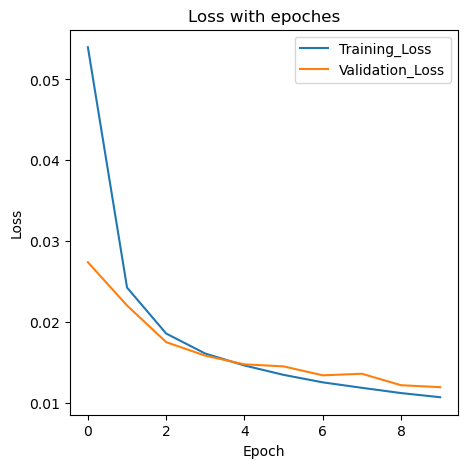

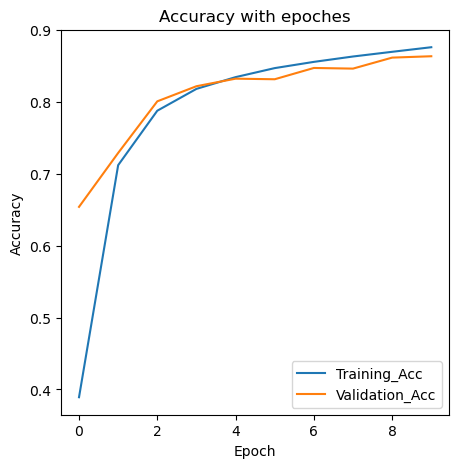

In [69]:
# plot
plt.figure(figsize=(5, 5))
plt.plot(train_loss, label='Training_Loss')
plt.plot(valid_loss, label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss with epoches")
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(train_acc, label='Training_Acc')
plt.plot(valid_acc, label='Validation_Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy with epoches")
plt.legend()
plt.show()

## Problem 2: CNN for CIFAR-10 (20 points)

In this section, you will construct a Convolutional Neural Network (CNN) for the CIFAR - 10 dataset. You have already utilized this dataset in the coding part of Homework 2. However, in this particular part, there is no need to download the dataset separately. It is advisable to employ GPU acceleration for this section to enhance the operational efficiency. Nevertheless, this is not a mandatory requirement.

Here are some of the components you should consider using:
1. `nn.Conv2d`
2. `nn.ReLU`
3. `nn.Linear`
4. `nn.CrossEntropyLoss`
5. `nn.MaxPooling2d` (Optional, many implementations without it exist)

We encourage you to explore different ways of improving your model to obtain higher accuracies. Here are some suggestions for things to look into:
1. Popular CNN architectures like ResNets, etc.
2. Different optimizers and their parameters (see `torch.optim`)
3. Image preprocessing / data augmentation (see `torchvision.transforms`)
4. Regularization or dropout (see `torch.optim` and `torch.nn` respectively)
5. Learning rate scheduling: https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate

Though we encourage you to explore, there are some rules:
1. You are not allowed to use any pre-defined architectures or feature extractors in your network.
2. You are not allowed to use **any** pretrained weights, i.e. no transfer learning.
3. You cannot train on the test data (that would pretty much defeat the whole point of machine learning).

<font color='red'>Scoring Criteria:</font>
1. The final test accuracy of your model should be $\geq 0.80$ to obtain **10 points**.<br>
If $0.7\leq$ test_acc $< 0.8$, you will get **5 points**. <br>
 If test_acc $< 0.7$, no score will be awarded.
2. Print out the train loss, train accuracy, validation loss, and validation accuracy for each epoch.**(5 points)**
3. Provide at least one training curve for your model. This curve should depict the training loss and validation loss per epoch or step after training for at least 10 epochs. **(5 points)**

In [61]:
# Creating the datasets, feel free to change this as long as you do the same to the test data.
# You can also modify this to split the data into training and validation.
# See https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split

# Training and Validation transforms
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Testing transform
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Training and validation data
train_val_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=False,
    transform=transform_train,
)

train_size = int(0.9*len(train_val_data))
val_size = len(train_val_data) - train_size

# 9:1 randomly split the original training set to training and validation set
generator = torch.Generator().manual_seed(42)

train_data, valid_data = torch.utils.data.random_split(
    train_val_data,
    [train_size, val_size],
    generator=generator
)

# Official testing set.
test_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=False,
    transform=transform_test,
)

print(f"Training size: {len(train_data)}")
print(f"Validation size: {len(valid_data)}")
print(f"Testing size: {len(test_data)}")

Training size: 45000
Validation size: 5000
Testing size: 10000


Again, let's first visualize our data.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.7537313].


torch.Size([3, 32, 32])


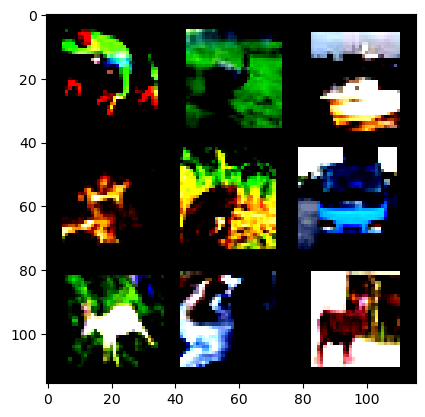

In [62]:
images = [train_data[i][0] for i in range(9)]
print(images[0].size())
plt.imshow(torchvision.utils.make_grid(torch.stack(images),
           nrow=3, padding=5).numpy().transpose((1, 2, 0)))

In [63]:
print("number of training samples: " + str(len(train_data)) + "\n" +
      "number of testing samples: " + str(len(valid_data)))
print("datatype of the 1st training sample: ", train_data[0][0].type())
print("size of the 1st training sample: ", train_data[0][0].size())

number of training samples: 45000
number of testing samples: 5000
datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([3, 32, 32])


In [64]:
max_label = float("-inf")
min_label = float("inf")
for i in range(len(train_data)):
  if train_data[i][1] > max_label:
    max_label = train_data[i][1]
  if train_data[i][1] < min_label:
    min_label = train_data[i][1]
print("max_label = "+str(max_label))
print("min_label = "+str(min_label))

max_label = 9
min_label = 0


### CNN Construction and Training

Here are some training tips for CNN training.
1. **Optimization for Gradient Descent.**
   1. **Stochastic gradient descent (SGD)** <br>
    `torch.optim.SGD` <br>
    When updating model parameters using only one training sample at each epoch, compared to traditional gradient descent methods that process the entire dataset, the memory and computational requirements are lower, which can accelerate convergence. Additionally, the randomness in the optimization process helps escape local minima. However, the noise in the updates may lead to a more erratic optimization path, unstable convergence speed, and the choice of learning rate becomes particularly crucial. <br>
    Moreover, you can use SGD with momentum. The momentum parameter (typically between 0.9 and 0.99) controls the influence of past gradients on the current update, enabling the algorithm to persistently move in promising directions.
    2. **RMSprop** <br>
        `torch.optim.RMSprop`<br>
        This method adaptively adjusts the learning rate based on the recent gradient history of parameters: it reduces the learning rate for parameters with consistently large gradients while increasing the update magnitude for those with smaller gradients, thereby balancing the step sizes of different parameter updates. The `alpha` parameter (decay rate, typically set to 0.9) in RMSprop controls how quickly old squared gradients are forgotten.
    3. **Adam** <br>
        `torch.optim.Adam`<br>
        Adam optimizer efficiently updates parameters by combining momentum (1st-order moment) and RMSprop (2nd-order moment) with adaptive learning rates and bias correction.
2. **Balancing hyperparameters (epochs, batch size, learning rate) is crucial during training.**
3. **Dealing with Overfitting**: <br>
    1. **Batch Normalization**: <br>
        `torch.nn.BatchNorm2d`<br>
        Batch normalization mitigates internal covariate shift by normalizing and rescaling layer inputs within each mini-batch.
    2. **MaxPooling Layers**:  <br>
        `nn.MaxPool2d`<br>
        spatial downsampling
    3. **Dropout**: <br>
        `torch.nn.Dropout`<br>
        Dropout randomly deactivates neurons during training to prevent overfitting and improve generalization.
    4. **L1/L2 Normalization**:<br>
        Configure the `weight_decay` parameter in the `optimizer`.
    5. **Early Stopping**<br>
        Implement early stopping by continuously monitoring validation performance and halting training when no improvement is observed for a predefined patience period.
4. **Dealing with Underfitting**: <br>
   1. **Deeper networks**
   2. **More training epochs**
   3. **Reasonably select activate functions**
   4. **Use a classic network architecture, e.g. ResNet.**
5. You are encouraged to add more optimization in order to reach your goal.

In [88]:
# 1. Confirm whether the CUDA is available or not.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

# 2. TODO: Encapsulate your Convolutional Neural Network (CNN) model within a class.
# This class should include a constructor function __init__(...) and a forward(...) function that is used to carry out forward propagation.
class CNN(nn.Module):
    def __init__(self,classes=10,n1=32,n2=64,n3=128,n4=256):
        ######## YOUR CODE HERE ########
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=n1, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=n1, out_channels=n2, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=n2, out_channels=n3, kernel_size=3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1=nn.Linear(4*4*n3,n4)
        self.fc2=nn.Linear(n4,classes)
        self.net=nn.Sequential(
            self.conv1,
            nn.ReLU(),
            self.maxpool,
            self.conv2,
            nn.ReLU(),
            self.maxpool,
            self.conv3,
            nn.ReLU(),
            self.maxpool,
            nn.Flatten(),
            self.fc1,
            nn.ReLU(),
            self.fc2


        )
        ######## END YOUR CODE ########

    def forward(self, x):
        ######## YOUR CODE HERE ########
        return self.net(x)
        pass
        ######## END YOUR CODE ########


# 3. Initialize your model
model = CNN().to(device)

# 4. TODO: Define the Training Parameters like epochs, batch_size, learning_rate, optimizer, criterion_loss, etc.
######## YOUR CODE HERE ########
epochs = 100
batch_size = 128
learning_rate = 0.001
optimizer = optim.AdamW(
    model.parameters(), 
    lr=learning_rate, 
    weight_decay=1e-4,  # 可选：L2正则化，防止过拟合
    amsgrad=True
)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3, factor=0.5)
#验证集表现停滞时：适合分类、检测等任务，当验证指标长时间不提升时自动调整。
criterion = torch.nn.CrossEntropyLoss() # loss function for multi-class classification
######## END YOUR CODE ########

# 5. TODO: Put the training and testing data into a DataLoader
# you can use torch.utils.data.DataLoader() to complete this step.
######## YOUR CODE HERE ########
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True) 
validation_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False) 
######## END YOUR CODE ########

# 6. Training
# During the training process, make sure to add the training accuracy, validation accuracy, training loss, and validation loss to the list below.
# This will allow you to visualize these metrics and assess whether the model is overfitting.
train_acc = []
valid_acc = []
train_loss = []
valid_loss = []
best_val_acc = 0.0 
patience= 5
best_model_state = None
model.train()  # Put model in training mode

for epoch in range(epochs):
    # TODO: Please mimic the training example of logistic regression above to write the training code here.
    ######## YOUR CODE HERE ########
    ProgressBar = tqdm(train_loader)
    train_correct = 0 
    training_loss = 0
    for x,y in ProgressBar:
        x,y = x.to(device),y.to(device)
        optimizer.zero_grad()
        pred = model(x)
        loss = criterion(pred,y)
        loss.backward()
        optimizer.step()
        training_loss += loss.item()
        train_correct += torch.sum(torch.argmax(pred, dim=1) == y).item()
    train_accuracy = train_correct / len(train_data) 
    train_acc.append(train_accuracy) # add training accuracy to the list
    train_loss.append((training_loss)/len(train_data)) 
    num_correct = 0
    validation_loss = 0

    # Validation
    with torch.no_grad():
        model.eval()  # Put model in eval mode
        for x_val, y_val in validation_loader:
            x_val, y_val = x_val.to(device), y_val.to(device)
            pred_val = model(x_val)
            loss_val = criterion(pred_val, y_val) # compute loss
            validation_loss+=loss_val.item()# add validation loss to the list
            num_correct += torch.sum(torch.argmax(pred_val, dim=1) == y_val).item()
        model.train()  # Put model back in train mode
    valid_accuracy = num_correct / len(valid_data)
    valid_acc.append(valid_accuracy) # add validation accuracy to the list
    valid_loss.append((validation_loss)/len(valid_data)) 
    # Learning rate scheduler
    scheduler.step(valid_accuracy)  # 更新学习率

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {np.mean(train_loss):.4f} | "
          f"Train Acc: {train_accuracy:.4f} | "
          f"Val Loss: {np.mean(valid_loss):.4f} | "
          f"Val Acc: {valid_accuracy:.4f}")



    # Early Stopping 检查
    if valid_accuracy > best_val_acc:
        best_val_acc = valid_accuracy
        no_improve = 0
        best_model_state = model.state_dict()  # 保存最佳模型
        print(f"Validation accuracy improved to {best_val_acc:.4f}, saving model...")
    else:
        no_improve += 1
        print(f"No improvement for {no_improve}/{patience} epochs")
        
        if no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}!")
            break  # 停止训练
    
    model.train()  # 切换回训练模式

# 加载最佳模型（防止过拟合）
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print("Loaded best model based on validation accuracy.")


    ######## END YOUR CODE ########

Using device cuda


  0%|          | 0/352 [00:00<?, ?it/s]

100%|██████████| 352/352 [00:16<00:00, 21.19it/s]


Epoch 1/100 | Train Loss: 0.0124 | Train Acc: 0.4180 | Val Loss: 0.0111 | Val Acc: 0.4962
Validation accuracy improved to 0.4962, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.52it/s]


Epoch 2/100 | Train Loss: 0.0110 | Train Acc: 0.5568 | Val Loss: 0.0101 | Val Acc: 0.6018
Validation accuracy improved to 0.6018, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.58it/s]


Epoch 3/100 | Train Loss: 0.0100 | Train Acc: 0.6313 | Val Loss: 0.0094 | Val Acc: 0.6292
Validation accuracy improved to 0.6292, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.55it/s]


Epoch 4/100 | Train Loss: 0.0093 | Train Acc: 0.6745 | Val Loss: 0.0088 | Val Acc: 0.6880
Validation accuracy improved to 0.6880, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.69it/s]


Epoch 5/100 | Train Loss: 0.0088 | Train Acc: 0.7073 | Val Loss: 0.0084 | Val Acc: 0.7152
Validation accuracy improved to 0.7152, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.61it/s]


Epoch 6/100 | Train Loss: 0.0083 | Train Acc: 0.7295 | Val Loss: 0.0081 | Val Acc: 0.7088
No improvement for 1/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.60it/s]


Epoch 7/100 | Train Loss: 0.0079 | Train Acc: 0.7451 | Val Loss: 0.0078 | Val Acc: 0.7360
Validation accuracy improved to 0.7360, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.61it/s]


Epoch 8/100 | Train Loss: 0.0076 | Train Acc: 0.7582 | Val Loss: 0.0076 | Val Acc: 0.7224
No improvement for 1/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.61it/s]


Epoch 9/100 | Train Loss: 0.0074 | Train Acc: 0.7658 | Val Loss: 0.0074 | Val Acc: 0.7532
Validation accuracy improved to 0.7532, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.56it/s]


Epoch 10/100 | Train Loss: 0.0071 | Train Acc: 0.7792 | Val Loss: 0.0072 | Val Acc: 0.7574
Validation accuracy improved to 0.7574, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.59it/s]


Epoch 11/100 | Train Loss: 0.0069 | Train Acc: 0.7857 | Val Loss: 0.0070 | Val Acc: 0.7748
Validation accuracy improved to 0.7748, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.37it/s]


Epoch 12/100 | Train Loss: 0.0067 | Train Acc: 0.7909 | Val Loss: 0.0069 | Val Acc: 0.7628
No improvement for 1/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.52it/s]


Epoch 13/100 | Train Loss: 0.0066 | Train Acc: 0.7996 | Val Loss: 0.0068 | Val Acc: 0.7716
No improvement for 2/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.30it/s]


Epoch 14/100 | Train Loss: 0.0064 | Train Acc: 0.8072 | Val Loss: 0.0067 | Val Acc: 0.7804
Validation accuracy improved to 0.7804, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.34it/s]


Epoch 15/100 | Train Loss: 0.0062 | Train Acc: 0.8129 | Val Loss: 0.0066 | Val Acc: 0.7848
Validation accuracy improved to 0.7848, saving model...


100%|██████████| 352/352 [00:17<00:00, 20.20it/s]


Epoch 16/100 | Train Loss: 0.0061 | Train Acc: 0.8177 | Val Loss: 0.0065 | Val Acc: 0.7734
No improvement for 1/5 epochs


100%|██████████| 352/352 [00:17<00:00, 20.32it/s]


Epoch 17/100 | Train Loss: 0.0060 | Train Acc: 0.8200 | Val Loss: 0.0064 | Val Acc: 0.7864
Validation accuracy improved to 0.7864, saving model...


100%|██████████| 352/352 [00:17<00:00, 20.67it/s]


Epoch 18/100 | Train Loss: 0.0059 | Train Acc: 0.8280 | Val Loss: 0.0063 | Val Acc: 0.7910
Validation accuracy improved to 0.7910, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.55it/s]


Epoch 19/100 | Train Loss: 0.0058 | Train Acc: 0.8298 | Val Loss: 0.0062 | Val Acc: 0.7876
No improvement for 1/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.51it/s]


Epoch 20/100 | Train Loss: 0.0057 | Train Acc: 0.8353 | Val Loss: 0.0061 | Val Acc: 0.7924
Validation accuracy improved to 0.7924, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.53it/s]


Epoch 21/100 | Train Loss: 0.0056 | Train Acc: 0.8370 | Val Loss: 0.0061 | Val Acc: 0.7938
Validation accuracy improved to 0.7938, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.56it/s]


Epoch 22/100 | Train Loss: 0.0055 | Train Acc: 0.8399 | Val Loss: 0.0060 | Val Acc: 0.7998
Validation accuracy improved to 0.7998, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.56it/s]


Epoch 23/100 | Train Loss: 0.0054 | Train Acc: 0.8419 | Val Loss: 0.0060 | Val Acc: 0.7916
No improvement for 1/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.52it/s]


Epoch 24/100 | Train Loss: 0.0053 | Train Acc: 0.8478 | Val Loss: 0.0059 | Val Acc: 0.7896
No improvement for 2/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.61it/s]


Epoch 25/100 | Train Loss: 0.0052 | Train Acc: 0.8497 | Val Loss: 0.0059 | Val Acc: 0.7964
No improvement for 3/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.44it/s]


Epoch 26/100 | Train Loss: 0.0051 | Train Acc: 0.8539 | Val Loss: 0.0058 | Val Acc: 0.8076
Validation accuracy improved to 0.8076, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.34it/s]


Epoch 27/100 | Train Loss: 0.0051 | Train Acc: 0.8554 | Val Loss: 0.0058 | Val Acc: 0.8062
No improvement for 1/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.54it/s]


Epoch 28/100 | Train Loss: 0.0050 | Train Acc: 0.8605 | Val Loss: 0.0057 | Val Acc: 0.8148
Validation accuracy improved to 0.8148, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.48it/s]


Epoch 29/100 | Train Loss: 0.0049 | Train Acc: 0.8608 | Val Loss: 0.0057 | Val Acc: 0.8112
No improvement for 1/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.51it/s]


Epoch 30/100 | Train Loss: 0.0049 | Train Acc: 0.8636 | Val Loss: 0.0057 | Val Acc: 0.8012
No improvement for 2/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.46it/s]


Epoch 31/100 | Train Loss: 0.0048 | Train Acc: 0.8651 | Val Loss: 0.0056 | Val Acc: 0.7958
No improvement for 3/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.59it/s]


Epoch 32/100 | Train Loss: 0.0048 | Train Acc: 0.8684 | Val Loss: 0.0056 | Val Acc: 0.8102
No improvement for 4/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.42it/s]


Epoch 33/100 | Train Loss: 0.0047 | Train Acc: 0.8866 | Val Loss: 0.0056 | Val Acc: 0.8166
Validation accuracy improved to 0.8166, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.52it/s]


Epoch 34/100 | Train Loss: 0.0046 | Train Acc: 0.8890 | Val Loss: 0.0055 | Val Acc: 0.8188
Validation accuracy improved to 0.8188, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.55it/s]


Epoch 35/100 | Train Loss: 0.0046 | Train Acc: 0.8924 | Val Loss: 0.0055 | Val Acc: 0.8196
Validation accuracy improved to 0.8196, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.56it/s]


Epoch 36/100 | Train Loss: 0.0045 | Train Acc: 0.8916 | Val Loss: 0.0055 | Val Acc: 0.8222
Validation accuracy improved to 0.8222, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.59it/s]


Epoch 37/100 | Train Loss: 0.0044 | Train Acc: 0.8941 | Val Loss: 0.0055 | Val Acc: 0.8184
No improvement for 1/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.62it/s]


Epoch 38/100 | Train Loss: 0.0044 | Train Acc: 0.8960 | Val Loss: 0.0054 | Val Acc: 0.8206
No improvement for 2/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.54it/s]


Epoch 39/100 | Train Loss: 0.0043 | Train Acc: 0.8964 | Val Loss: 0.0054 | Val Acc: 0.8168
No improvement for 3/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.60it/s]


Epoch 40/100 | Train Loss: 0.0043 | Train Acc: 0.8970 | Val Loss: 0.0054 | Val Acc: 0.8176
No improvement for 4/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.62it/s]


Epoch 41/100 | Train Loss: 0.0042 | Train Acc: 0.9080 | Val Loss: 0.0054 | Val Acc: 0.8278
Validation accuracy improved to 0.8278, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.49it/s]


Epoch 42/100 | Train Loss: 0.0042 | Train Acc: 0.9107 | Val Loss: 0.0053 | Val Acc: 0.8268
No improvement for 1/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.64it/s]


Epoch 43/100 | Train Loss: 0.0041 | Train Acc: 0.9102 | Val Loss: 0.0053 | Val Acc: 0.8268
No improvement for 2/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.50it/s]


Epoch 44/100 | Train Loss: 0.0041 | Train Acc: 0.9115 | Val Loss: 0.0053 | Val Acc: 0.8236
No improvement for 3/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.34it/s]


Epoch 45/100 | Train Loss: 0.0040 | Train Acc: 0.9132 | Val Loss: 0.0053 | Val Acc: 0.8268
No improvement for 4/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.42it/s]


Epoch 46/100 | Train Loss: 0.0040 | Train Acc: 0.9167 | Val Loss: 0.0053 | Val Acc: 0.8312
Validation accuracy improved to 0.8312, saving model...


100%|██████████| 352/352 [00:16<00:00, 21.50it/s]


Epoch 47/100 | Train Loss: 0.0039 | Train Acc: 0.9188 | Val Loss: 0.0052 | Val Acc: 0.8312
No improvement for 1/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.48it/s]


Epoch 48/100 | Train Loss: 0.0039 | Train Acc: 0.9198 | Val Loss: 0.0052 | Val Acc: 0.8236
No improvement for 2/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.54it/s]


Epoch 49/100 | Train Loss: 0.0038 | Train Acc: 0.9193 | Val Loss: 0.0052 | Val Acc: 0.8252
No improvement for 3/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.53it/s]


Epoch 50/100 | Train Loss: 0.0038 | Train Acc: 0.9205 | Val Loss: 0.0052 | Val Acc: 0.8300
No improvement for 4/5 epochs


100%|██████████| 352/352 [00:16<00:00, 21.27it/s]


Epoch 51/100 | Train Loss: 0.0038 | Train Acc: 0.9222 | Val Loss: 0.0052 | Val Acc: 0.8278
No improvement for 5/5 epochs
Early stopping triggered at epoch 51!
Loaded best model based on validation accuracy.


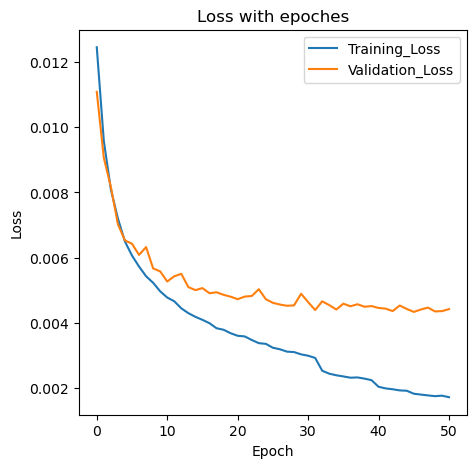

In [89]:
# Plot Your Training and Validation loss in one picture here.
plt.figure(figsize=(5, 5))
plt.plot(train_loss, label='Training_Loss')
plt.plot(valid_loss, label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss with epoches")
plt.legend()
plt.show()

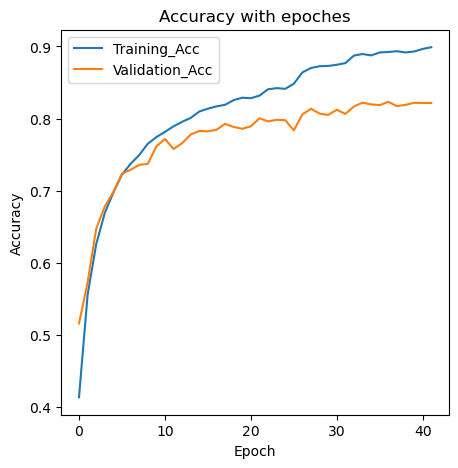

In [84]:
# Plot Your Training and Validation accuracy in one picture here.
plt.figure(figsize=(5, 5))
plt.plot(train_acc, label='Training_Acc')
plt.plot(valid_acc, label='Validation_Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy with epoches")
plt.legend()
plt.show()

## Testing

In [90]:
def evaluate_model(model, test_data, device='cuda', batch_size=128):
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
    model.eval()
    model.to(device)
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = 100 * correct / total

    print(f'Test Accuracy: {accuracy:.2f}%')
    print(f'Correct/Total: {correct}/{total}')
    print('\nClassification Report:')
    print(classification_report(all_labels, all_preds, target_names=test_data.classes))

In [91]:
evaluate_model(model, test_data)

Test Accuracy: 84.53%
Correct/Total: 8453/10000

Classification Report:
              precision    recall  f1-score   support

    airplane       0.86      0.87      0.86      1000
  automobile       0.93      0.92      0.92      1000
        bird       0.81      0.78      0.80      1000
         cat       0.70      0.72      0.71      1000
        deer       0.81      0.84      0.82      1000
         dog       0.77      0.76      0.77      1000
        frog       0.87      0.88      0.88      1000
       horse       0.89      0.86      0.88      1000
        ship       0.92      0.90      0.91      1000
       truck       0.89      0.92      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

